Install requirements

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -r yolov5/requirements.txt  # install dependencies
!pip install -U PyYAML
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


Download dataset from robflow

In [ ]:
%cd /content
!curl -L "https://app.roboflow.ai/ds/Tuhdynqz3P?key=6BhIcQbqoN" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1033      0 --:--:-- --:--:-- --:--:--  1032
100 23.5M  100 23.5M    0     0  11.7M      0  0:00:02  0:00:02 --:--:-- 51.3M
Archive:  roboflow.zip
 extracting: train/images/209_jpg.rf.02abf0c70c5abc1f78fe3a2176c3a88c.jpg  
 extracting: train/images/91_jpg.rf.018943d4d8096a43455dde40d64d712d.jpg  
 extracting: train/images/13_jpg.rf.02532e716ff5b965937441f74dc61f88.jpg  
 extracting: train/images/208_jpg.rf.00e625c88bddc6a86de055bcb88a918c.jpg  
 extracting: train/images/13_jpg.rf.0271d0b6cbd0eb6f0bbede6faee87e3e.jpg  
 extracting: train/images/32_jpg.rf.02b5e9292d2224efaa03f0049cbaeda4.jpg  
 extracting: train/images/123_jpg.rf.0204cd8a0cb6b4c58991fd9c410af646.jpg  
 extracting: train/images/172_jpg.rf.044b3be59ab2e0a929479b27b8ae0240.jpg  
 extracting: train/images/55_jpg.rf.011535db731c

Training part 

You can choose your checkpoint weights and other hyper parameters

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 300 --batch 4 --epochs 100 --data '../data.yaml' --cfg '../yolov5x.yaml' --weights yolov5x.pt --name people-counting-yolo-5x  --cache

/content/yolov5
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='../yolov5x.yaml', data='../data.yaml', device='', epochs=100, evolve=False, img_size=[300], multi_scale=False, name='people-counting-yolo-5x', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5x.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

2020-07-03 09:16:02.546456: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at h

Test out network

In [ ]:
!python detect.py --weights weights/best_people-counting-yolo-5x.pt --img 300 --conf 0.5 --source ../valid/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', fourcc='mp4v', img_size=300, iou_thres=0.5, output='inference/output', save_txt=False, source='../valid/images', view_img=False, weights='weights/best_people-counting-yolo-5x.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

image 1/47 ../valid/images/10_jpg.rf.47b693683cd503276b8454f73c303d4f.jpg: 320x320 8 persons, Done. (0.075s)
image 2/47 ../valid/images/11_jpg.rf.dc7d2ff6c11b4269fab76ad10e4e04e5.jpg: 320x320 5 persons, Done. (0.069s)
image 3/47 ../valid/images/12_jpg.rf.cfbaf156bef6453df31347e43466b584.jpg: 320x320 4 persons, Done. (0.069s)
image 4/47 ../valid/images/13_jpg.rf.0dcd82919459c2bb090805d4d46491a1.jpg: 320x320 5 persons, Done. (0.068s)
image 5/47 ../valid/images/14_jpg.rf.9ae68fce880c3d1c594d5fae5b120c62.jpg: 320x320 3 persons, Done. (0.067s)
image 6/47 ../valid/images/15_jpg.rf.0ed357696b3e34ca8b8b1ffc55c2caa7.jpg: 320x320 4 persons, Done. (0.067s

You can see the results underneath

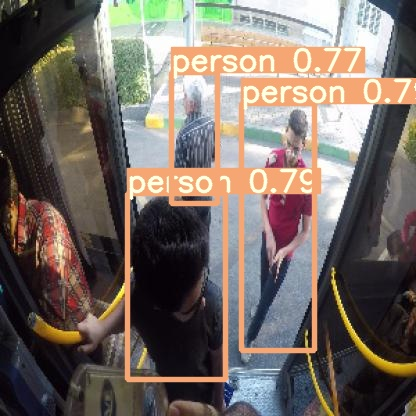

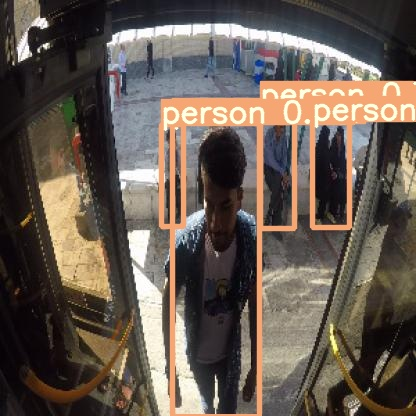

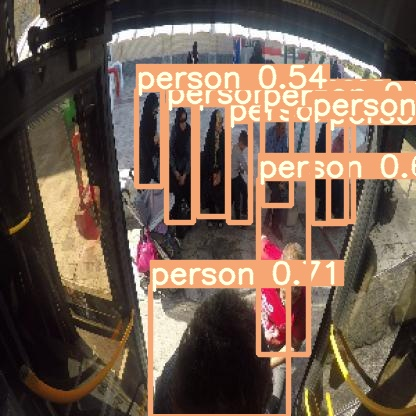

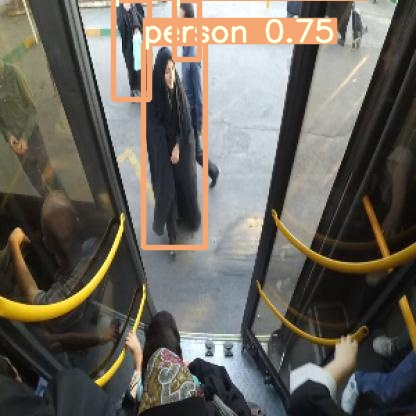

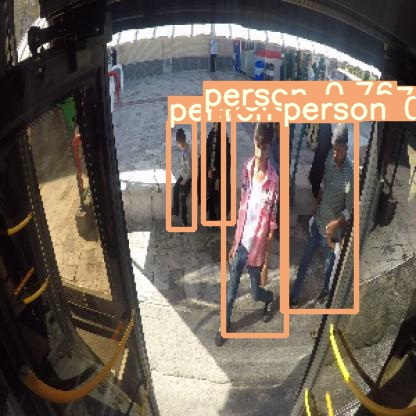

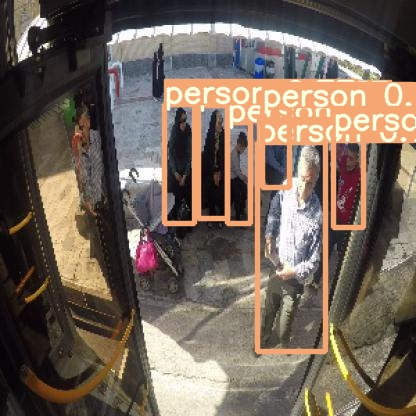

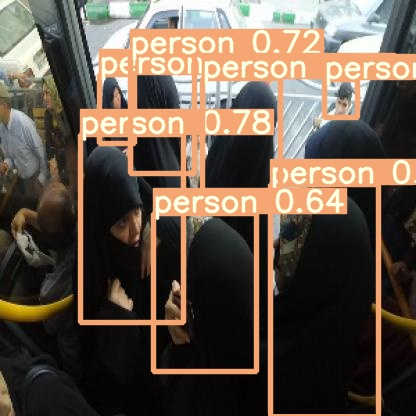

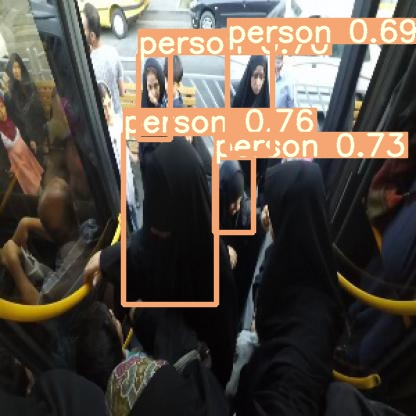

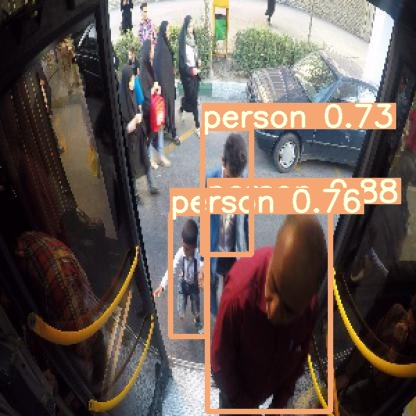

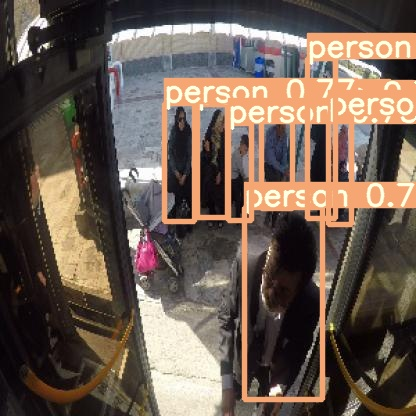

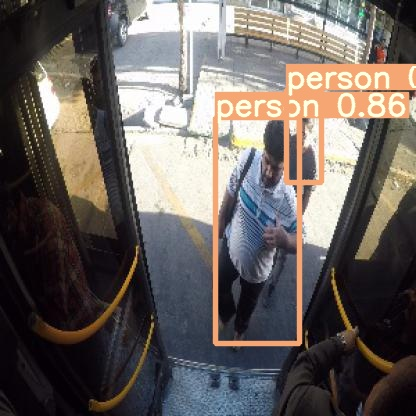

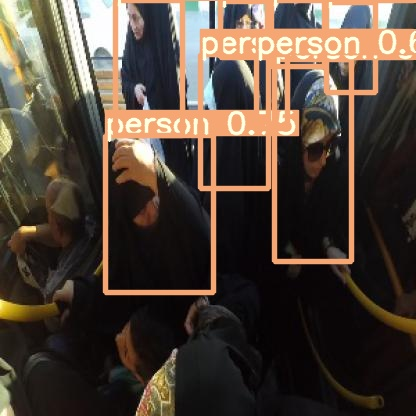

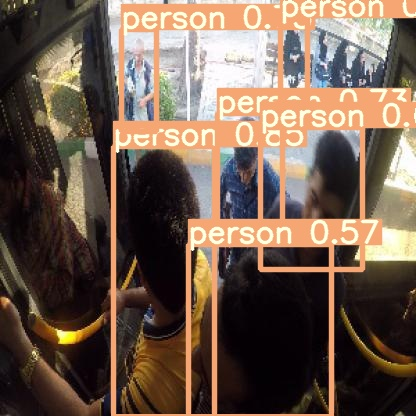

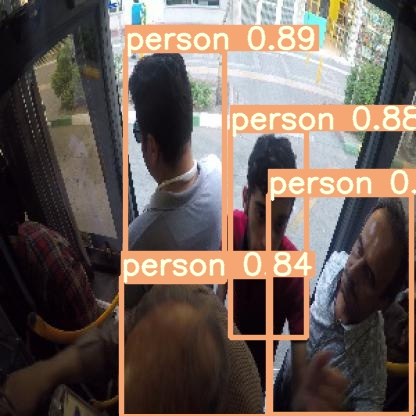

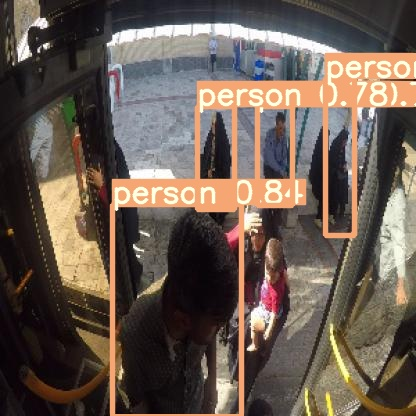

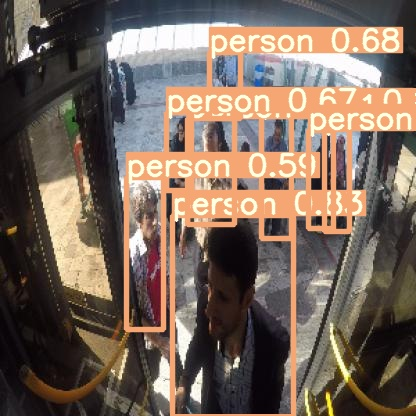

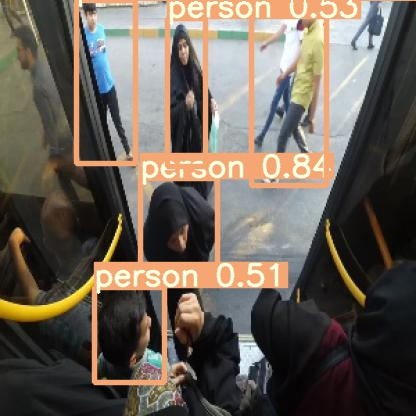

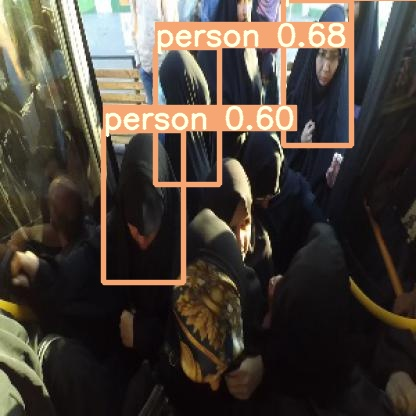

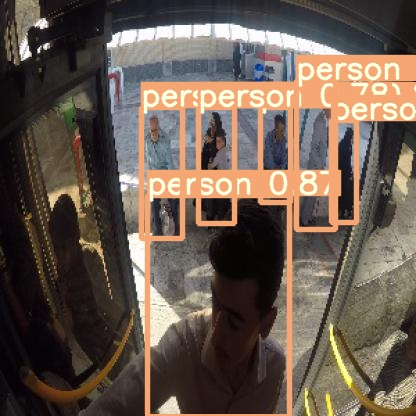

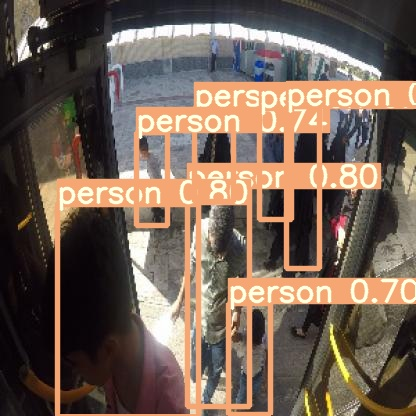

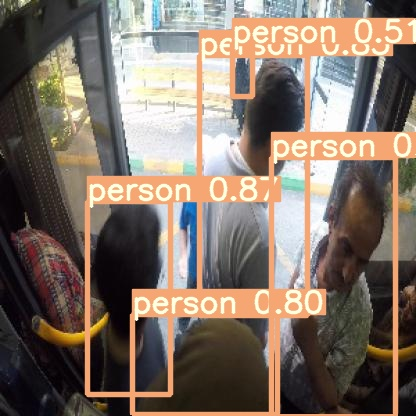

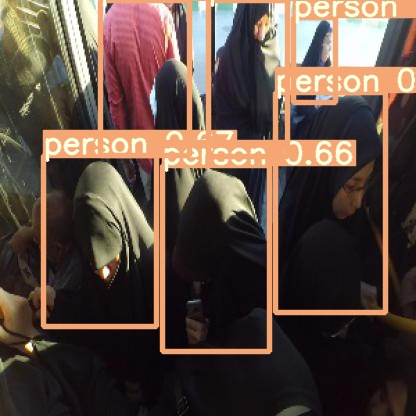

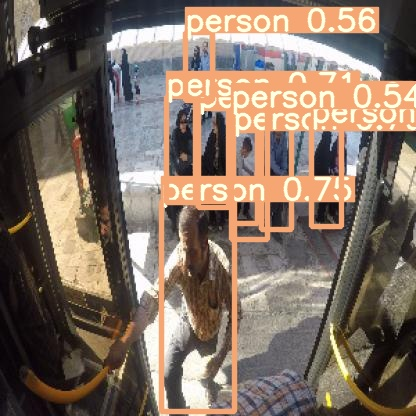

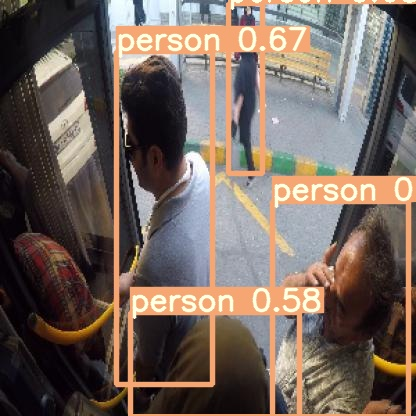

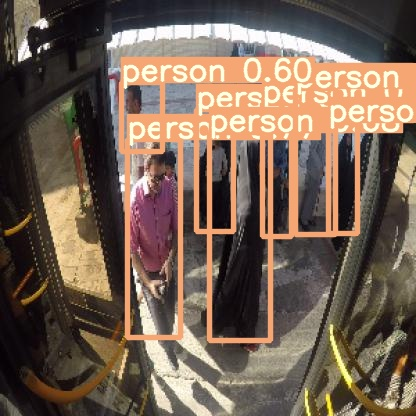

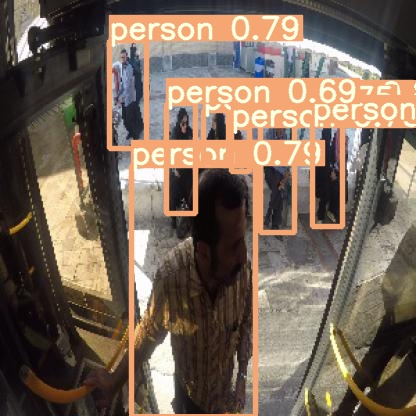

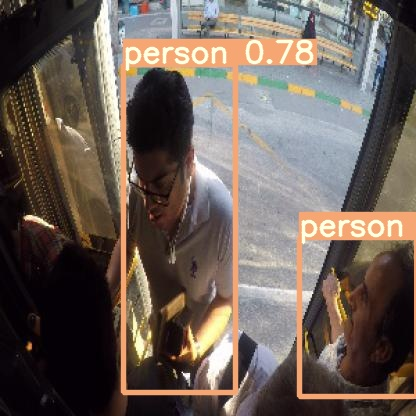

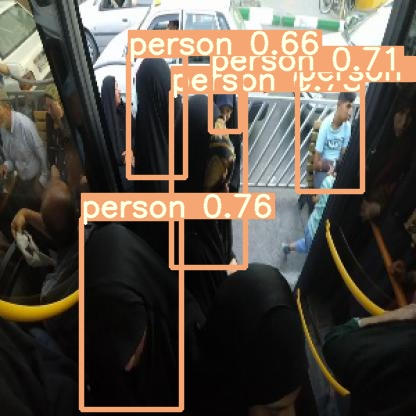

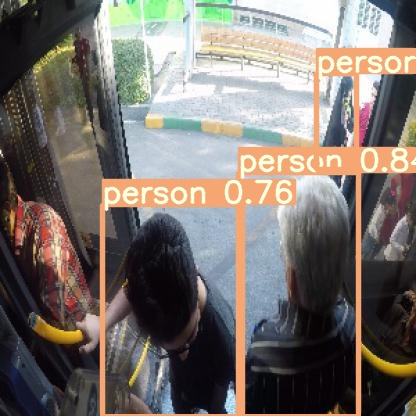

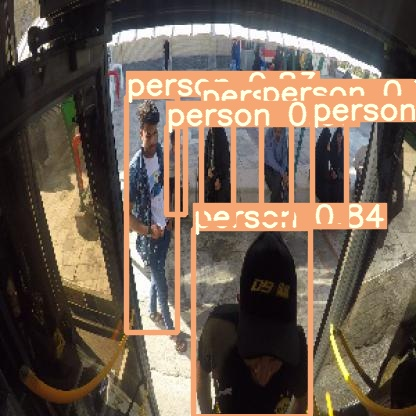

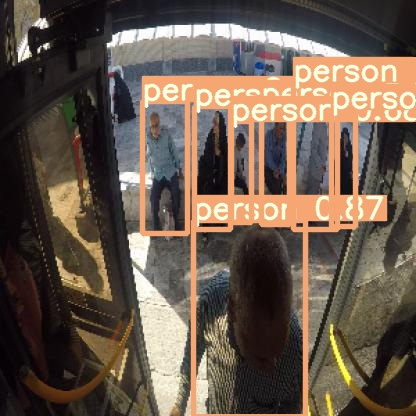

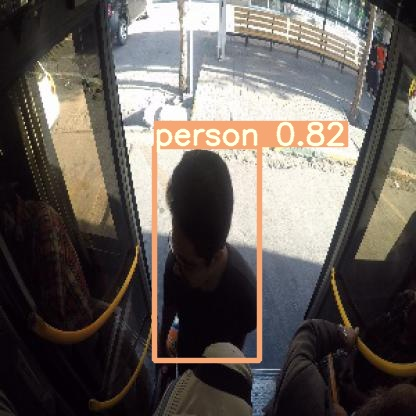

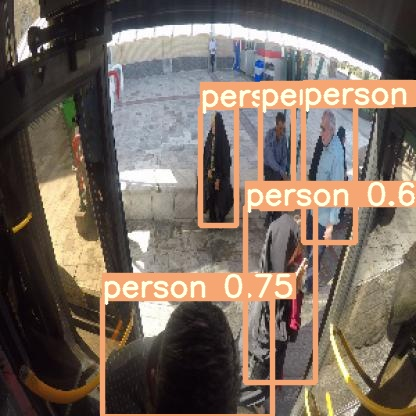

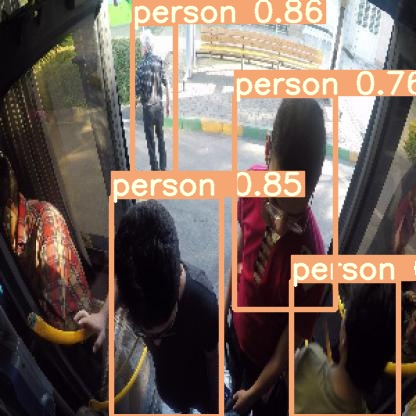

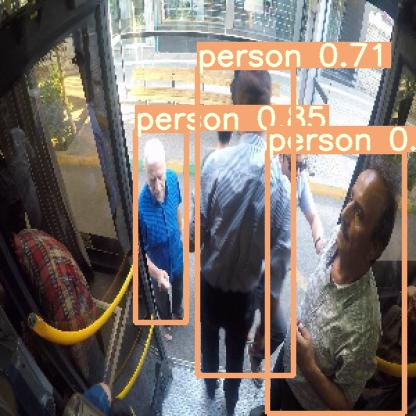

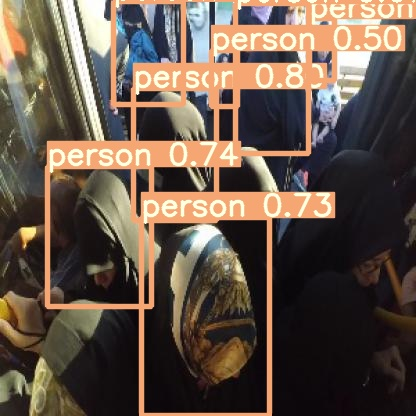

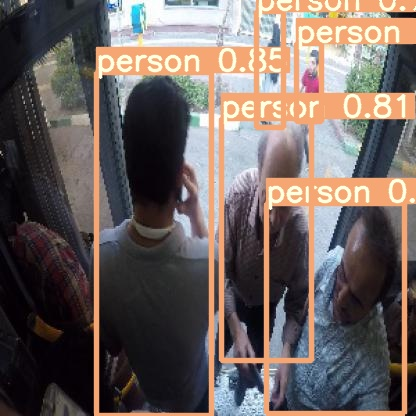

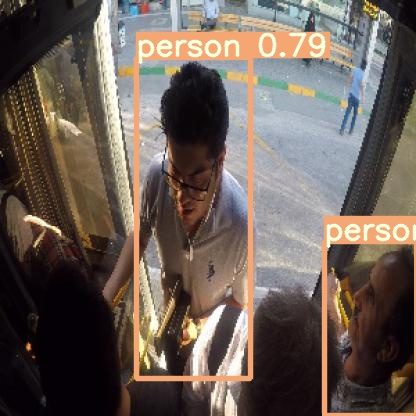

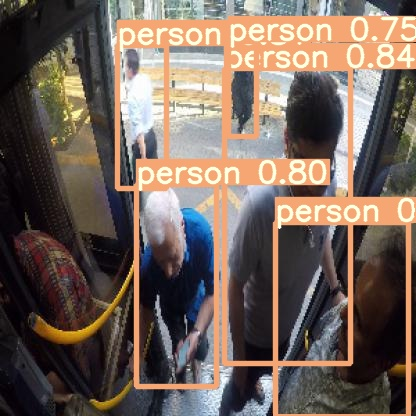

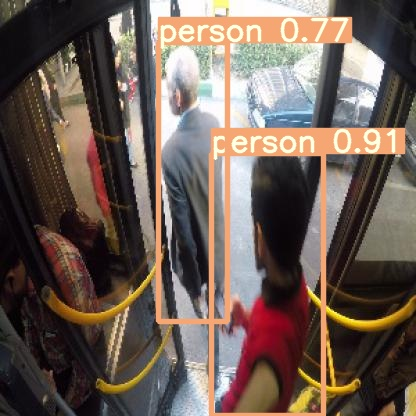

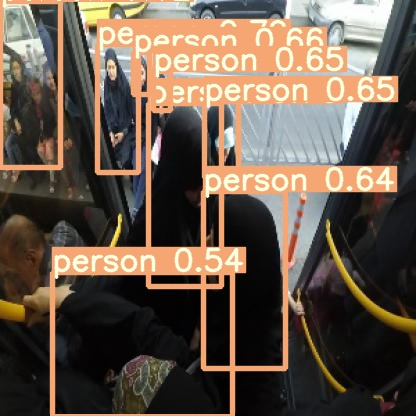

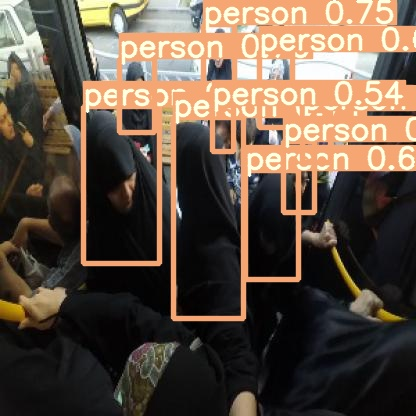

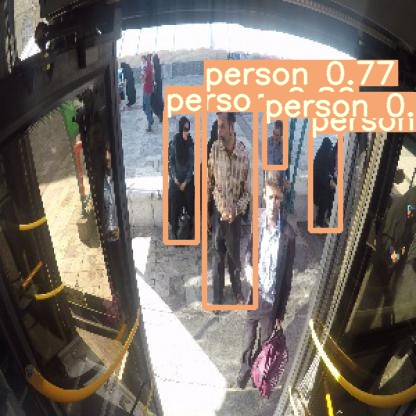

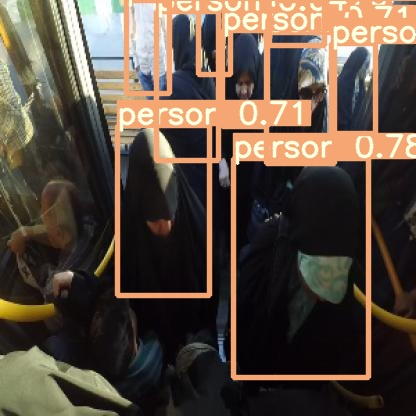

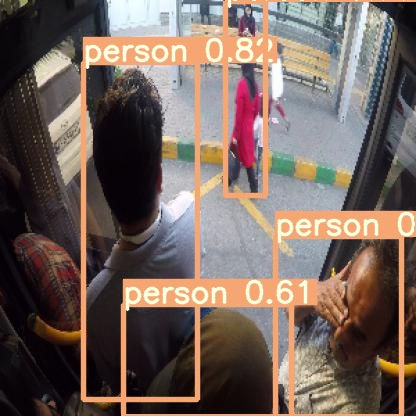

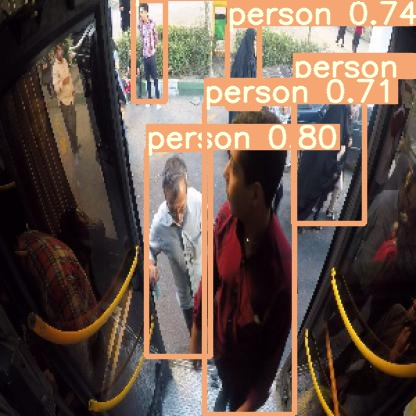

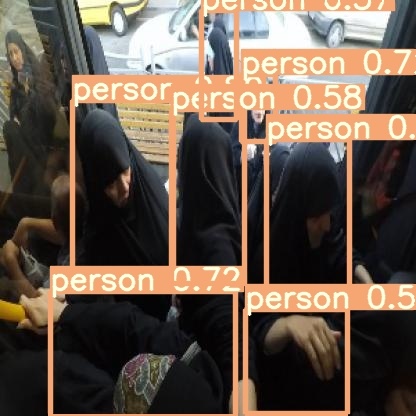

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/inference/output/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")